### Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import signal
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from loess.loess_1d import loess_1d
from statsmodels.nonparametric.smoothers_lowess import lowess

### User Defined Functions

In [2]:
def create_exp(N, A, B):
    expo = A*np.exp(-B*np.arange(0,N))
    return expo
def create_lin(N, a, b):
    lin = a*np.arange(0,N) + b
    return lin
def concat_noise(C, m = 0, s = 1):
    # import numpy as np
    concat = []
    for c in C:
        concat.extend(c)
    X = np.arange(0,len(concat))
    Y = concat +  np.random.normal(loc=m, scale=s, size=len(concat))
    return X, Y

def RMSE(Ypred, Yreal):
    rmse = np.sqrt(np.sum(np.square(Ypred-Yreal))/np.shape(Ypred)[0])
    return rmse
def fit_and_pred(X, y):
    Xarr = np.array(X).reshape(-1,1)
    yarr = np.array(y).reshape(-1,1)
    reg = LinearRegression().fit(Xarr, yarr)
    pred = reg.predict(Xarr)
    rmse = RMSE(pred, yarr)
    return rmse
def sliding_window_pred(X, y, window, lag):
    Xmax = np.shape(X)[0]-window+1
    start = np.arange(0, Xmax, lag)
    score = [fit_and_pred(X[s:s+window], y[s:s+window]) 
            for s in start]    
    return score

### Generate exp and linear parts of the data

In [3]:
expo = create_exp(N = 15000, A = 10 , B = 0.0001)
lin = create_lin(N = 15000, a = -0.00005 , b = expo[-1]-0.01*expo[-1])
print(expo)
print(lin)

[10.          9.99900005  9.9980002  ...  2.23197109  2.23174791
  2.23152474]
[2.2092095 2.2091595 2.2091095 ... 1.4593595 1.4593095 1.4592595]


### Data with weak noise

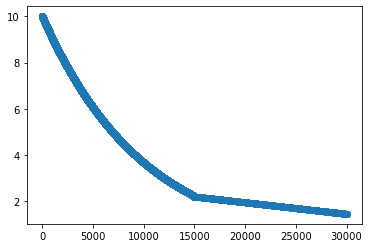

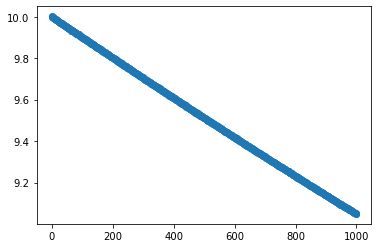

In [4]:
# %% low noise
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.001)

plt.scatter(X,Y)
plt.show()
plt.scatter(X[0:1000],Y[0:1000])
plt.show()

### Implementation of the algorithm and diagnostic plots

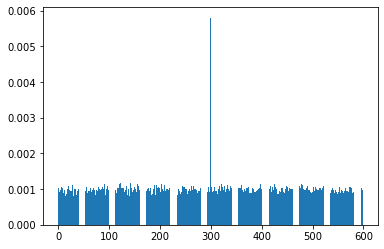

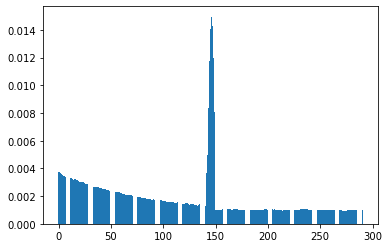

In [15]:
score = sliding_window_pred(X = X, y = Y,
                            window = 100, 
                            lag = 50)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()


# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 1000, 
                            lag = 100)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()

### More Noisy Data

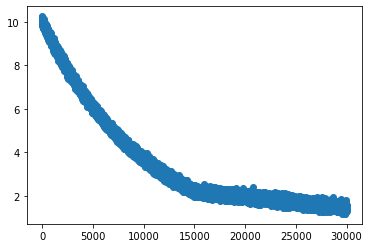

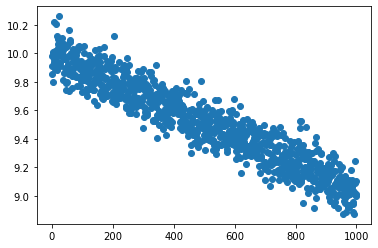

In [16]:
# %% more noisy data
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.1)

# %%
plt.scatter(X,Y)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.show()

#### GridSearch for assessing the best combination of hyperparameters (window, lag)

In [18]:
for i in [2111, 3111, 4811, 5877, 6854]:
    for j in [11, 59, 111, 337, 511, 777]:
        score = sliding_window_pred(X = X, y = Y, 
                                    window = i, 
                                    lag = j)
        deltascore = np.round(np.max(np.diff(score))/0.001,3)
        print("\n for window : {} and lag : {} \n delta max diff score is : {}".vformat(i, j, deltascore))



 for window : 2111 and lag : 11 
 delta max diff score is : 0.544

 for window : 2111 and lag : 59 
 delta max diff score is : 1.212

 for window : 2111 and lag : 111 
 delta max diff score is : 1.651

 for window : 2111 and lag : 337 
 delta max diff score is : 2.298

 for window : 2111 and lag : 511 
 delta max diff score is : 2.747

 for window : 2111 and lag : 777 
 delta max diff score is : 3.745

 for window : 3111 and lag : 11 
 delta max diff score is : 0.506

 for window : 3111 and lag : 59 
 delta max diff score is : 1.353

 for window : 3111 and lag : 111 
 delta max diff score is : 2.1

 for window : 3111 and lag : 337 
 delta max diff score is : 5.142

 for window : 3111 and lag : 511 
 delta max diff score is : 5.997

 for window : 3111 and lag : 777 
 delta max diff score is : 8.251

 for window : 4811 and lag : 11 
 delta max diff score is : 0.52

 for window : 4811 and lag : 59 
 delta max diff score is : 1.508

 for window : 4811 and lag : 111 
 delta max diff score 

### Implementation of the algorithm and diagnostic plots

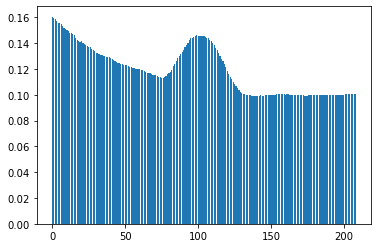

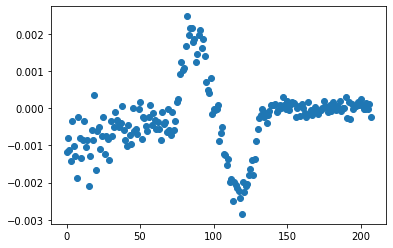

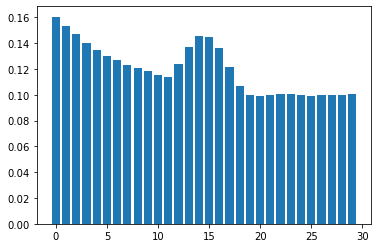

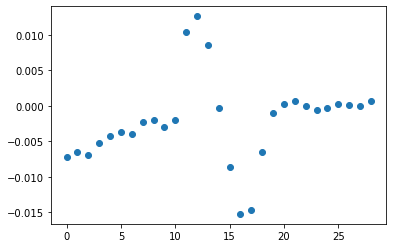

In [20]:
score = sliding_window_pred(X = X, y = Y, 
                            window = 6854, 
                            lag = 111)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()



plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()

# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 6854, 
                            lag = 777)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()

plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()


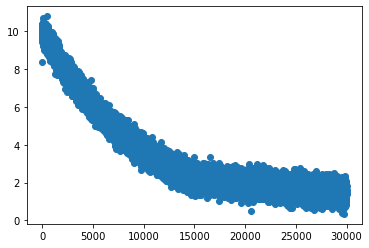

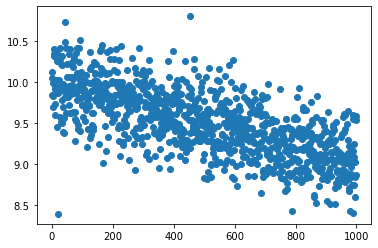

In [21]:
# %% still more noisy data
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.3)

# %%
plt.scatter(X,Y)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.show()


#### GridSearch for assessing the best combination of hyperparameters (window, lag)

In [22]:
for i in [2111, 3111, 4811, 5877, 6854]:
    for j in [11, 59, 111, 337, 511, 777, 1279, 2447]:
        score = sliding_window_pred(X = X, y = Y, 
                                    window = i, 
                                    lag = j)
        deltascore = np.round(np.max(np.diff(score)-np.mean(np.diff(score)))/0.001,3)
        print("\n for window : {} and lag : {} \n delta max diff score is : {}".format(i, j, deltascore))



 for window : 2111 and lag : 11 
 delta max diff score is : 1.765

 for window : 2111 and lag : 59 
 delta max diff score is : 3.091

 for window : 2111 and lag : 111 
 delta max diff score is : 3.667

 for window : 2111 and lag : 337 
 delta max diff score is : 7.283

 for window : 2111 and lag : 511 
 delta max diff score is : 5.881

 for window : 2111 and lag : 777 
 delta max diff score is : 8.414

 for window : 2111 and lag : 1279 
 delta max diff score is : 9.122

 for window : 2111 and lag : 2447 
 delta max diff score is : 11.48

 for window : 3111 and lag : 11 
 delta max diff score is : 1.285

 for window : 3111 and lag : 59 
 delta max diff score is : 2.736

 for window : 3111 and lag : 111 
 delta max diff score is : 2.347

 for window : 3111 and lag : 337 
 delta max diff score is : 4.541

 for window : 3111 and lag : 511 
 delta max diff score is : 4.634

 for window : 3111 and lag : 777 
 delta max diff score is : 4.966

 for window : 3111 and lag : 1279 
 delta max dif

### Implementation of the algorithm and diagnostic plots

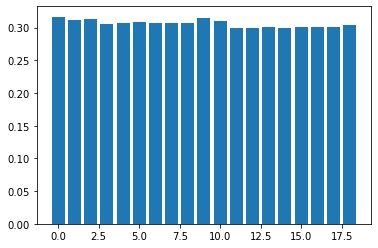

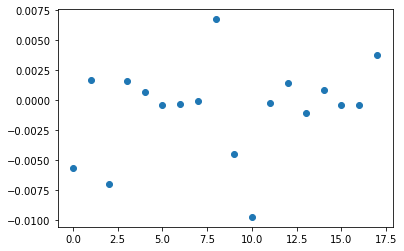

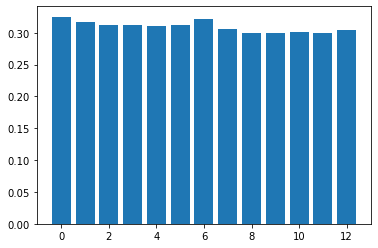

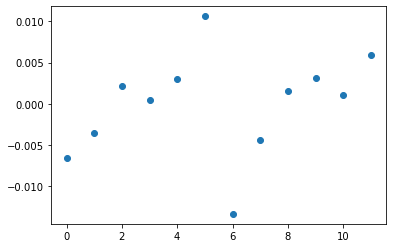

In [25]:
score = sliding_window_pred(X = X, y = Y, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()



plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()

# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 6854, 
                            lag = 1900)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()

plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score)-np.mean(np.diff(score)))
plt.show()


# Smoothing noisy signal

###  Savgol filter

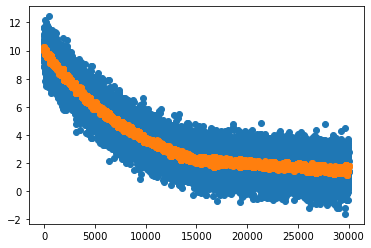

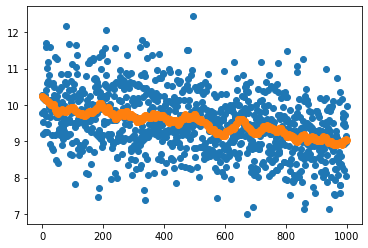

In [5]:
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.8)
Ysmooth = signal.savgol_filter(Y, 53, 1)

 # %%
plt.scatter(X,Y)
plt.scatter(X,Ysmooth)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.scatter(X[0:1000],Ysmooth[0:1000])
plt.show()

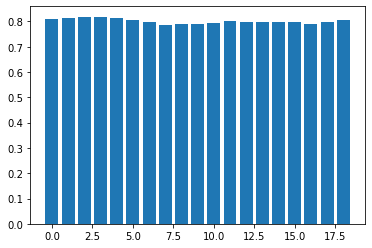

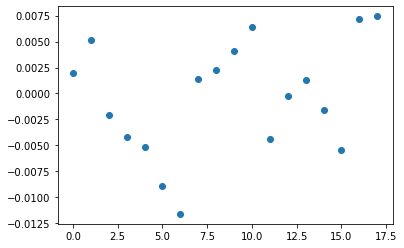

In [6]:
# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('No smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('No smoothing')
plt.show()

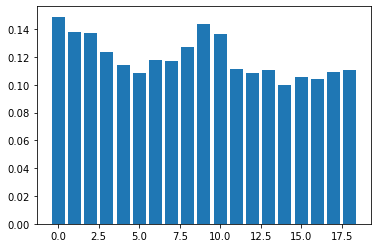

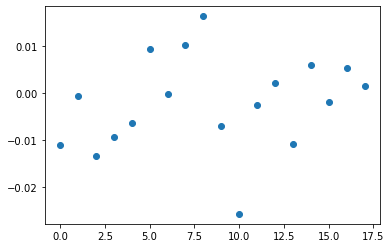

In [7]:
score = sliding_window_pred(X = X, y = Ysmooth, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('With smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('With smoothing')
plt.show()

## Convolution smoothing

In [8]:
# %%
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    
    
    https://scipy.github.io/old-wiki/pages/Cookbook/SignalSmooth.html
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [9]:
#%%
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.8)
Ysmooth = smooth(Y,window_len=150,window='hamming')[0:30000]

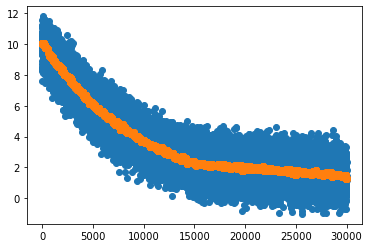

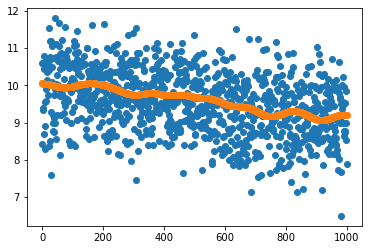

In [10]:
 # %%
plt.scatter(X,Y)
plt.scatter(X,Ysmooth)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.scatter(X[0:1000],Ysmooth[0:1000])
plt.show()

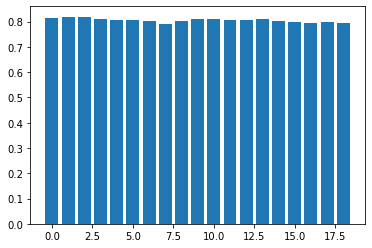

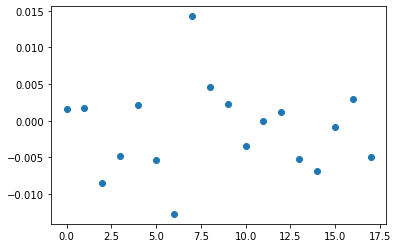

In [11]:
# %% 
score = sliding_window_pred(X = X, y = Y, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('No smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('No smoothing')
plt.show()

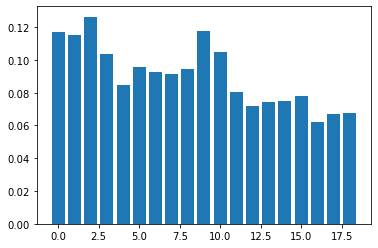

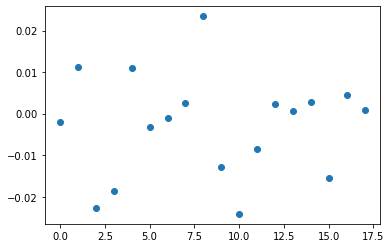

In [12]:
score = sliding_window_pred(X = X, y = Ysmooth, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('With smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('With smoothing')
plt.show()

## Loess smoothing

In [117]:
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.8)

# delta & frac : hyperparameters for adjusting smoothing

Ysmooth = lowess(exog = X, endog = Y, frac = 0.01, delta = 0.001 * X.shape[0], return_sorted = False)

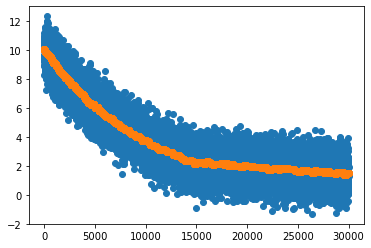

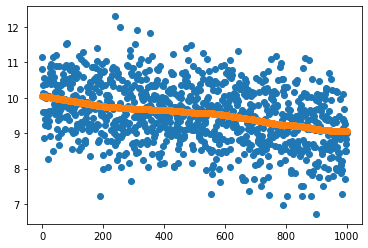

In [118]:
plt.scatter(X,Y)
plt.scatter(X,Ysmooth)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.scatter(X[0:1000],Ysmooth[0:1000])
plt.show()

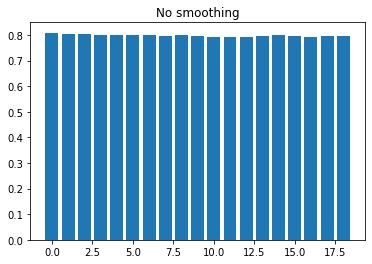

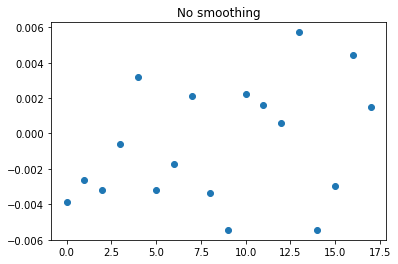

In [119]:
# %% 
score = sliding_window_pred(X = X, y = Y, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('No smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('No smoothing')
plt.show()

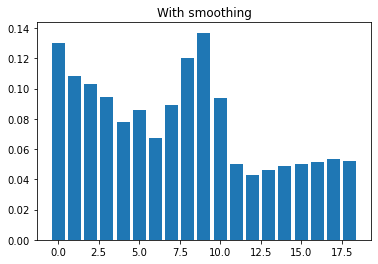

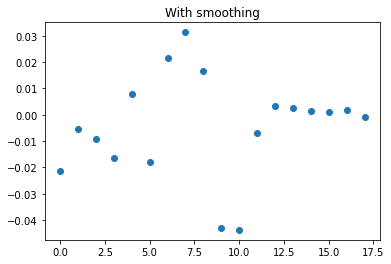

In [120]:
score = sliding_window_pred(X = X, y = Ysmooth, 
                            window = 6587, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('With smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('With smoothing')
plt.show()

## Gaussian Process Regressor

**NB : Not working yet, need to find the optimal kernel**

In [ ]:
# %%
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.8)
k1 = 1.0*RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))  # long term smooth rising trend
k4 = WhiteKernel(noise_level=1e-1)  # noise terms
kernel_gpml = k1 + k4
gpr = GaussianProcessRegressor(kernel = kernel_gpml, random_state=0).fit(X.reshape(-1,1), Y.reshape(-1,1))
Ysmooth= gpr.predict(X.reshape(-1,1), return_std=True)

In [ ]:
 # %%
plt.scatter(X,Y)
plt.scatter(X,Ysmooth)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.scatter(X[0:1000],Ysmooth[0:1000])
plt.show()

In [ ]:
# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()

In [ ]:
score = sliding_window_pred(X = X, y = Ysmooth, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()

# Other useful methods

https://link.medium.com/hGdVrrxPabb

https://github.com/arvkevi/kneed

https://stackoverflow.com/questions/28269379/curve-curvature-in-numpy

https://iescoders.com/calculating-the-curvature-of-a-curve/

https://github.com/Pjer-zhang/PJCurvature/blob/master/src/py/PJcurvature_demo.ipynb